<a href="https://colab.research.google.com/github/Dannyhamtar/MachineLearning/blob/main/UAS/UAS_MNIST_Danny_Hamtar_Pangestu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Danny Hamtar Pangestu**

**Nim : 1103210037**

**Tugas : UAS Machine Learning**

**Dataset : MNIST**

# 1. Import Library

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Memuat Dataset

In [19]:
# Memuat data MNIST dari keras dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Menampilkan jumlah data pelatihan dan pengujian
print(f"Jumlah data pelatihan: {train_images.shape[0]}")
print(f"Jumlah data pengujian: {test_images.shape[0]}")


Jumlah data pelatihan: 60000
Jumlah data pengujian: 10000


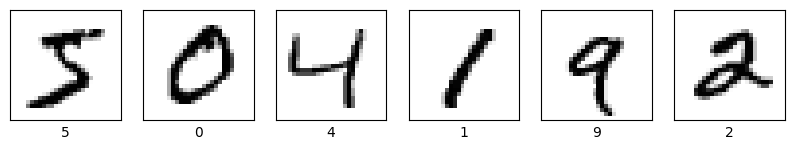

In [20]:
# Menentukan jumlah gambar yang ingin ditampilkan
num_images = 6

# Menampilkan gambar dari dataset pelatihan
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# 3. Visualisasi Data

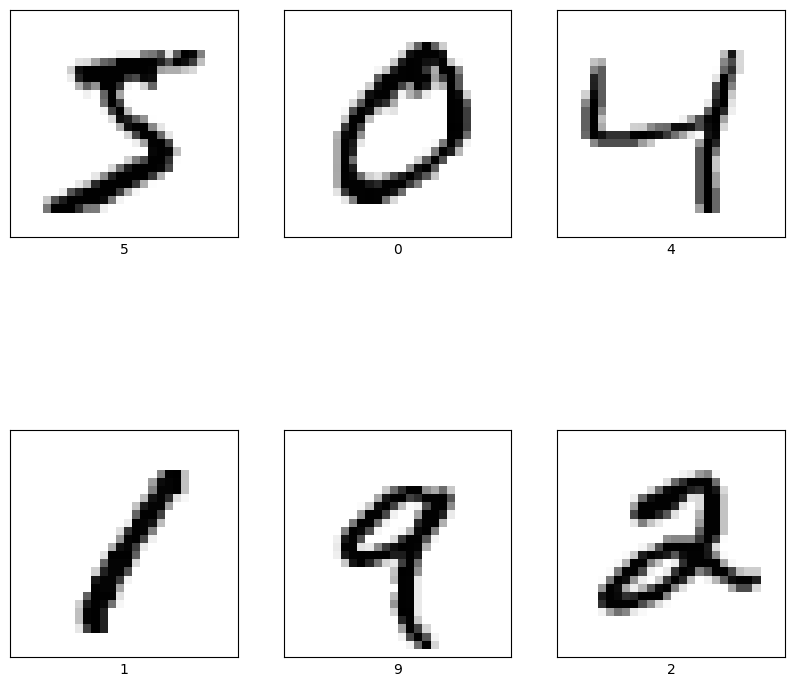

In [21]:
# Menampilkan beberapa gambar dari dataset pelatihan untuk memberi gambaran tentang data
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# 4. Preprocessing Data

In [22]:
# Mengubah dimensi gambar menjadi (28, 28, 1) untuk cocok dengan input CNN
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32')

In [23]:
# Normalisasi nilai piksel gambar ke rentang 0-1
train_images /= 255
test_images /= 255

In [24]:
# One hot encoding untuk label
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# 5. Membuat Model CNN

In [25]:
# Mendefinisikan model CNN menggunakan Sequential API
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [26]:
# Mengkompilasi model dengan optimizer Adam, loss categorical crossentropy dan metrik akurasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Training Model

In [27]:
# Melatih model dengan data pelatihan, menggunakan 20% data untuk validasi
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 57s 146ms/step - loss: 0.3438 - accuracy: 0.8959 - val_loss: 0.0807 - val_accuracy: 0.9747
Epoch 2/10
375/375 [==============================] - 50s 132ms/step - loss: 0.1087 - accuracy: 0.9681 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 3/10
375/375 [==============================] - 42s 113ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 4/10
375/375 [==============================] - 40s 108ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0459 - val_accuracy: 0.9865
Epoch 5/10
375/375 [==============================] - 41s 108ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.0381 - val_accuracy: 0.9899
Epoch 7/10
375/375 [==============================] - 38s 102ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0346 - val_ac

# 7. Evaluasi Model dan Visualisasi Confusion Matrix

In [28]:
# Mengevaluasi model dengan data pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Visualisasi akurasi dan loss selama pelatihan
plt.figure(figsize=(12, 4))

313/313 [==============================] - 3s 8ms/step - loss: 0.0242 - accuracy: 0.9923
Test accuracy: 0.9922999739646912


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

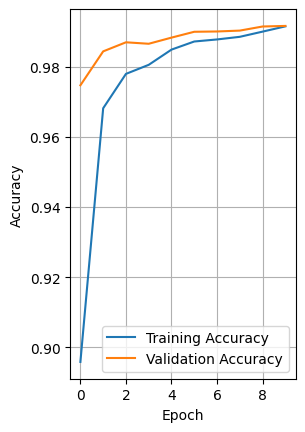

In [29]:
# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

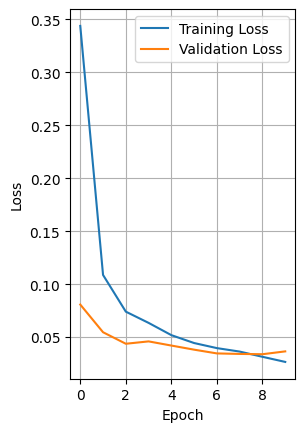

In [30]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [31]:
# Prediksi pada dataset pengujian
predictions = model.predict(test_images)
# Mendapatkan label prediksi dan label sebenarnya
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 [==============================] - 3s 11ms/step


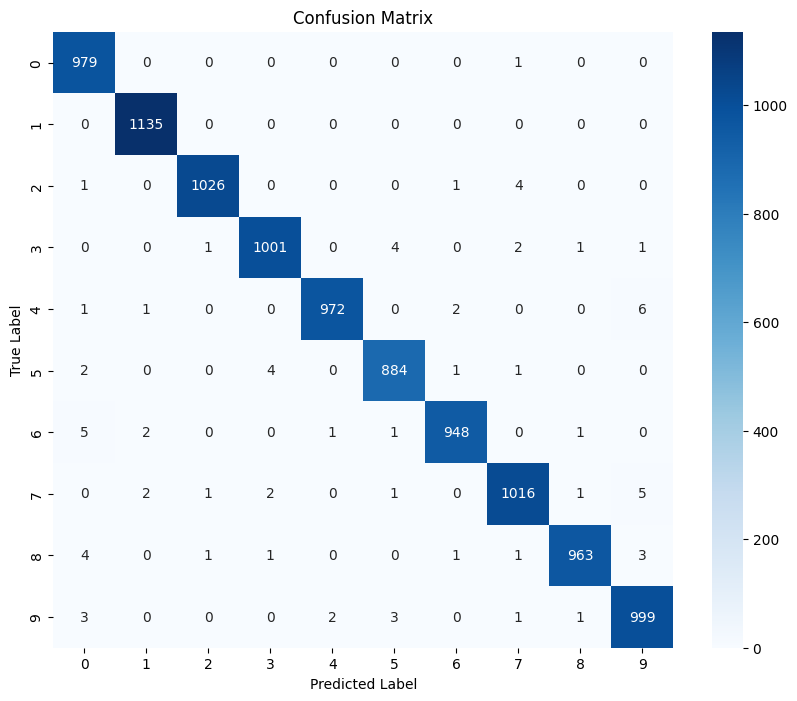

In [32]:
# Visualisasi confusion matrix menggunakan seaborn
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 8. Prediksi dan Visualisasi

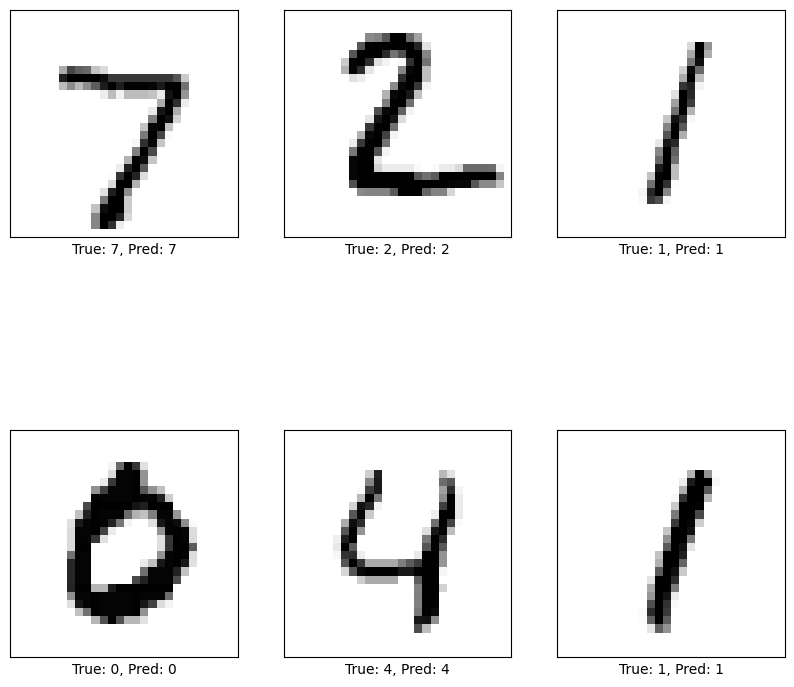

In [33]:
# Visualisasi beberapa prediksi
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
plt.show()

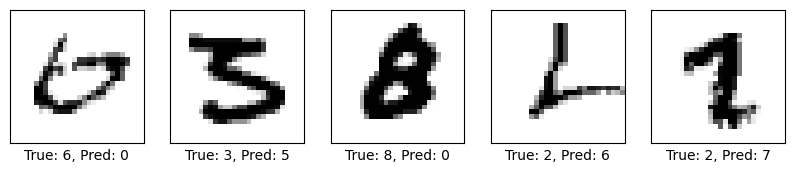

In [34]:
# Menampilkan contoh yang salah diklasifikasikan
incorrect = np.where(predicted_labels != true_labels)[0]
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = incorrect[i]
    plt.imshow(test_images[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
plt.show()

In [35]:
# Menampilkan classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

